In [1]:
import numpy as np
from scipy import stats
import scipy.stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import shapiro

# 과제1

In [2]:
# 실습
df_ano = pd.read_csv("ANOVA.csv", engine = "python")

In [3]:
df_ano.head()

,time,charge,gangjong,type
0,32.2,A,a,a
1,30.4,B,a,a
2,33.6,C,a,a
3,36.4,D,a,a
4,33.9,E,a,a


In [4]:
df_time = df_ano[['gangjong', 'time']]

In [5]:
df_a = df_time[df_time['gangjong'] == 'a']['time']
df_b = df_time[df_time['gangjong'] == 'b']['time']
df_c = df_time[df_time['gangjong'] == 'c']['time']
df_d = df_time[df_time['gangjong'] == 'd']['time']

In [6]:
# ANOVA 실행
f_result = stats.f_oneway(df_a, df_b, df_c, df_d)

# ANOVA의 F값 p값 저장
f, p = f_result.statistic.round(3), f_result.pvalue.round(3)

# ANOVA의 f값 p값 출력
print("One-way ")
print(" F 통계량: {}".format(f))
print(" p-value: {}".format(p))

One-way 
 F 통계량: 4.172
 p-value: 0.019


# 과제 2

In [7]:
# 실습 상관분석
# df 생성
df = pd.DataFrame({'Strength': [37.6, 38.6, 37.2, 36.4, 38.6, 39, 37.2, 36.1, 35.9, 37.1, 36.9, 37.5, 36.3, 38.1, 39, 36.9, 36.8, 37.6, 33, 33.5], 
                   'Temperature': [14, 15, 14, 16, 17, 14, 17, 16, 15, 16, 14 ,16, 18, 13, 15, 17, 14, 16, 20, 21]})

# Correlation Analysis 실행
corr, pval = stats.pearsonr(df['Strength'], df['Temperature'])

# Correlation, p-value 결과 출력
print("Correlation Analysis ")
print(' corr: {0:0.3f}'.format(corr))
print(' p-value: {0:0.3f}'.format(pval))

Correlation Analysis 
 corr: -0.723
 p-value: 0.000


# 과제3

In [8]:
# 실습 단순선형회귀
# 데이터 선언
Strength = [37.6, 38.6, 37.2, 36.4, 38.6, 39, 37.2, 36.1, 35.9, 37.1, 36.9, 37.5, 36.3, 38.1, 39, 36.9, 36.8, 37.6, 33, 33.5]
Baking_time = [0.798922, 0.84902, 0.816163, 0.758266, 0.815894, 0.807477, 0.809068, 0.7664, 0.742243, 0.751118, 0.740629, 0.751495, 0.738863, 0.827428, 0.818172, 0.740939, 0.757128, 0.804695, 0.695121, 0.735377]

# Simple Linear Regression 실행
Strength= sm.add_constant(Strength)
model = sm.OLS(Baking_time,Strength)
result = model.fit()

# Simple Linear Regresion 결과 출력
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     32.90
Date:                Tue, 28 Jan 2020   Prob (F-statistic):           1.95e-05
Time:                        09:30:44   Log-Likelihood:                 46.530
No. Observations:                  20   AIC:                            -89.06
Df Residuals:                      18   BIC:                            -87.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0023      0.135      0.017      0.9

(0.9451944828033447, 0.29996079206466675)

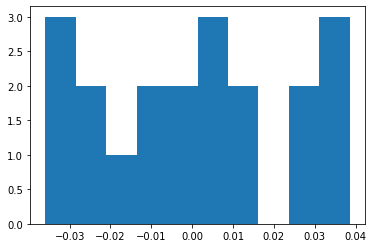

In [9]:
# 정규성 검정
plt.hist(result.resid)
shapiro(result.resid)

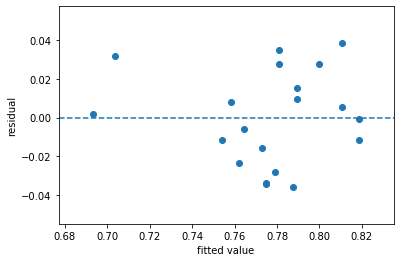

In [10]:
# 등분산성 검정
plt.scatter(result.fittedvalues, result.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y=0, linestyle = "--")

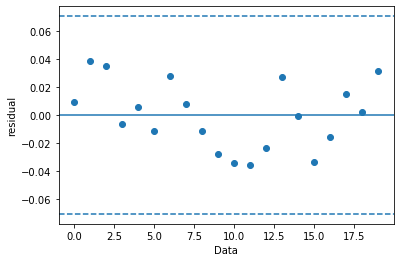

In [11]:
# 독립성 검정
plt.scatter(range(0,20), result.resid, marker = "o")
plt.xlabel("Data")
plt.ylabel("residual")
plt.axhline(y=0, linestyle = "-")
plt.axhline(y=3*np.std(result.resid), linestyle = "--")
plt.axhline(y=-3*np.std(result.resid), linestyle = "--")

In [12]:
# 더빈왓슨 통계량
from statsmodels.stats.stattools import durbin_watson
durbin_watson(result.resid)

1.1281763812390122